In [11]:
!pip install tensorflow matplotlib pandas seaborn scikit-learn matplotlib pandas seaborn tf_keras 
import os
import tensorflow as tf
# Ensure XLA is disabled
tf.config.optimizer.set_jit(False)

# Enable mixed precision training
from tensorflow.keras.mixed_precision import Policy, set_global_policy
policy = Policy('mixed_float16')
set_global_policy(policy)

In [12]:
import tensorflow as tf

In [13]:
import matplotlib.pyplot as plt 

In [14]:
import pandas as pd 

In [15]:
import seaborn as sns

In [16]:
# Training Image Processing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)
    

Found 70295 files belonging to 38 classes.


In [17]:
# Validation Image Preprocessing 
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [48]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [49]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[185.25 182.25 177.25]
   [171.   168.   163.  ]
   [181.   178.   173.  ]
   ...
   [206.5  205.5  201.5 ]
   [202.   201.   197.  ]
   [202.5  201.5  197.5 ]]

  [[181.5  178.5  173.5 ]
   [181.75 178.75 173.75]
   [176.75 173.75 168.75]
   ...
   [206.25 205.25 201.25]
   [204.5  203.5  199.5 ]
   [204.25 203.25 199.25]]

  [[176.25 173.25 168.25]
   [177.   174.   169.  ]
   [182.25 179.25 174.25]
   ...
   [206.   205.   201.  ]
   [207.75 206.75 202.75]
   [206.   205.   201.  ]]

  ...

  [[142.5  135.5  127.5 ]
   [139.   132.   124.  ]
   [138.75 131.75 123.75]
   ...
   [112.25 107.25 103.25]
   [102.    97.    93.  ]
   [100.75  95.75  91.75]]

  [[145.75 138.75 130.75]
   [136.75 129.75 121.75]
   [136.5  129.5  121.5 ]
   ...
   [ 96.    91.    87.  ]
   [107.25 102.25  98.25]
   [ 94.    89.    85.  ]]

  [[132.25 125.25 117.25]
   [133.   126.   118.  ]
   [135.75 128.75 120.75]
   ...
   [ 84.5   79.5   75.5 ]
   [ 91.75  86.75  82.75]
   [ 90.5   85.5   8

In [58]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(units=38, activation='softmax', dtype='float32')
])

In [59]:
# Compiling and Training Phase
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,311,750 (16.45 MB)

 Trainable params: 4,311,750 (16.45 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 332s 151ms/step - accuracy: 0.2167 - loss: 4.4128 - val_accuracy: 0.7749 - val_loss: 0.7681
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 325s 148ms/step - accuracy: 0.7363 - loss: 0.8702 - val_accuracy: 0.8841 - val_loss: 0.3818
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 314s 143ms/step - accuracy: 0.8465 - loss: 0.4855 - val_accuracy: 0.9101 - val_loss: 0.2830
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 344s 157ms/step - accuracy: 0.8960 - loss: 0.3281 - val_accuracy: 0.9189 - val_loss: 0.2532
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 343s 156ms/step - accuracy: 0.9234 - loss: 0.2392 - val_accuracy: 0.9348 - val_loss: 0.1980
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 354s 161ms/step - accuracy: 0.9390 - loss: 0.1859 - val_accuracy: 0.9429 - val_loss: 0.1729
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 346s 157ms/step - accuracy: 0.9498 - loss: 0.1466 - val_accuracy: 0.9565 - val_loss: 0.1333
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 338s 154ms/step - ac

In [22]:
# Evaluating Model
# Training Set Accuracy 
train_loss,train_acc = cnn.evaluate(training_set)
print(f'Training loss:{train_loss} \nTraining accuracy:{train_acc}')



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 190s 87ms/step - accuracy: 0.9960 - loss: 0.0164
Training loss:0.01506853848695755 
 Training accuracy:0.9965004920959473


In [24]:
# Validation Set Accuracy 
val_loss, val_acc = cnn.evaluate(validation_set)
print(f'Validation loss:{val_acc} \nValidation accuracy:{val_acc}')

550/550 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.9629 - loss: 0.1162
Validation loss:0.9610175490379333 
 Validation accuracy:0.9610175490379333


In [25]:
# Saving Model
cnn.save('trained_plant_disease_model.keras')
training_history.history # Return Dictionary of history

{'accuracy': [0.4146525263786316,
  0.7722455263137817,
  0.8600754141807556,
  0.9032505750656128,
  0.9281741380691528,
  0.9422149658203125,
  0.9516323804855347,
  0.9622448086738586,
  0.968376100063324,
  0.9709367752075195],
 'loss': [2.36999249458313,
  0.7465367317199707,
  0.4413532614707947,
  0.30387189984321594,
  0.22248151898384094,
  0.1750427633523941,
  0.14325033128261566,
  0.11438539624214172,
  0.09531186521053314,
  0.08545602858066559],
 'val_accuracy': [0.7748690843582153,
  0.8841338753700256,
  0.910141110420227,
  0.9189050793647766,
  0.9348395466804504,
  0.9428636431694031,
  0.9564648270606995,
  0.9550990462303162,
  0.9565786719322205,
  0.9610175490379333],
 'val_loss': [0.7680803537368774,
  0.3817804157733917,
  0.28303906321525574,
  0.2532348930835724,
  0.1979806125164032,
  0.17287959158420563,
  0.13327084481716156,
  0.13530999422073364,
  0.13945017755031586,
  0.12355314940214157]}

In [26]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [52]:
training_history.history['val_accuracy']

[0.7748690843582153,
 0.8841338753700256,
 0.910141110420227,
 0.9189050793647766,
 0.9348395466804504,
 0.9428636431694031,
 0.9564648270606995,
 0.9550990462303162,
 0.9565786719322205,
 0.9610175490379333]

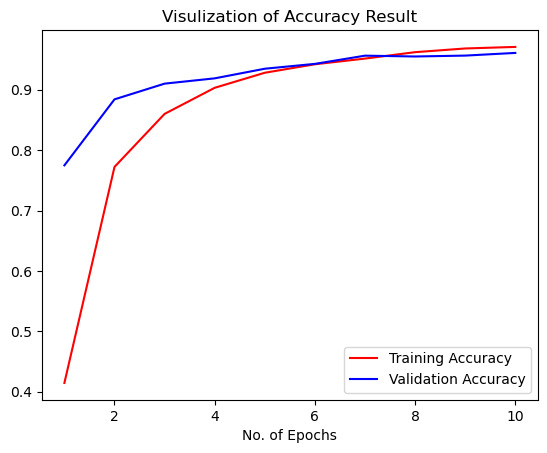

In [29]:
# Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visulization of Accuracy Result')
plt.legend()
plt.show()

In [30]:
# Other metrics for Model Evaluation 
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [44]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = cnn.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 161s 9ms/step


(array([[9.9990952e-01, 3.1880427e-05, 2.2320515e-10, ..., 3.9847632e-15,
         4.3508654e-14, 7.7865804e-11],
        [1.0000000e+00, 5.5162697e-09, 1.3738514e-10, ..., 1.3965345e-19,
         1.1350910e-15, 1.5955667e-13],
        [9.9999952e-01, 4.4244678e-07, 3.7713114e-11, ..., 4.9964910e-18,
         4.0413517e-15, 7.1338227e-11],
        ...,
        [1.0642668e-08, 6.7106785e-11, 2.3653170e-08, ..., 3.4675506e-11,
         6.2359473e-10, 9.9994278e-01],
        [3.3794567e-09, 1.3701976e-10, 8.3573110e-10, ..., 3.1978617e-12,
         1.8905072e-13, 9.9999952e-01],
        [9.1812727e-17, 1.5902502e-20, 3.4435435e-20, ..., 1.7776426e-20,
         1.8659810e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [47]:
predicted_catagories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 151s 9ms/step


In [61]:
predicted_catagories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
true_catagories = tf.concat([y for x, y in test_set], axis=0)
true_catagories

2024-07-12 10:22:22.981690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [63]:
Y_true = tf.argmax(true_catagories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [64]:
from sklearn.metrics import confusion_matrix,classification_report


In [66]:
print(classification_report(Y_true,predicted_catagories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.98      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.93      0.98      0.96       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [41]:
# Precision recall Fscore

In [69]:
cm = confusion_matrix(Y_true,predicted_catagories)
cm

array([[476,   6,   1, ...,   0,   0,   0],
       [  4, 479,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 459,   0,   0],
       [  1,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 476]])

In [70]:
### Confusion Matrix 

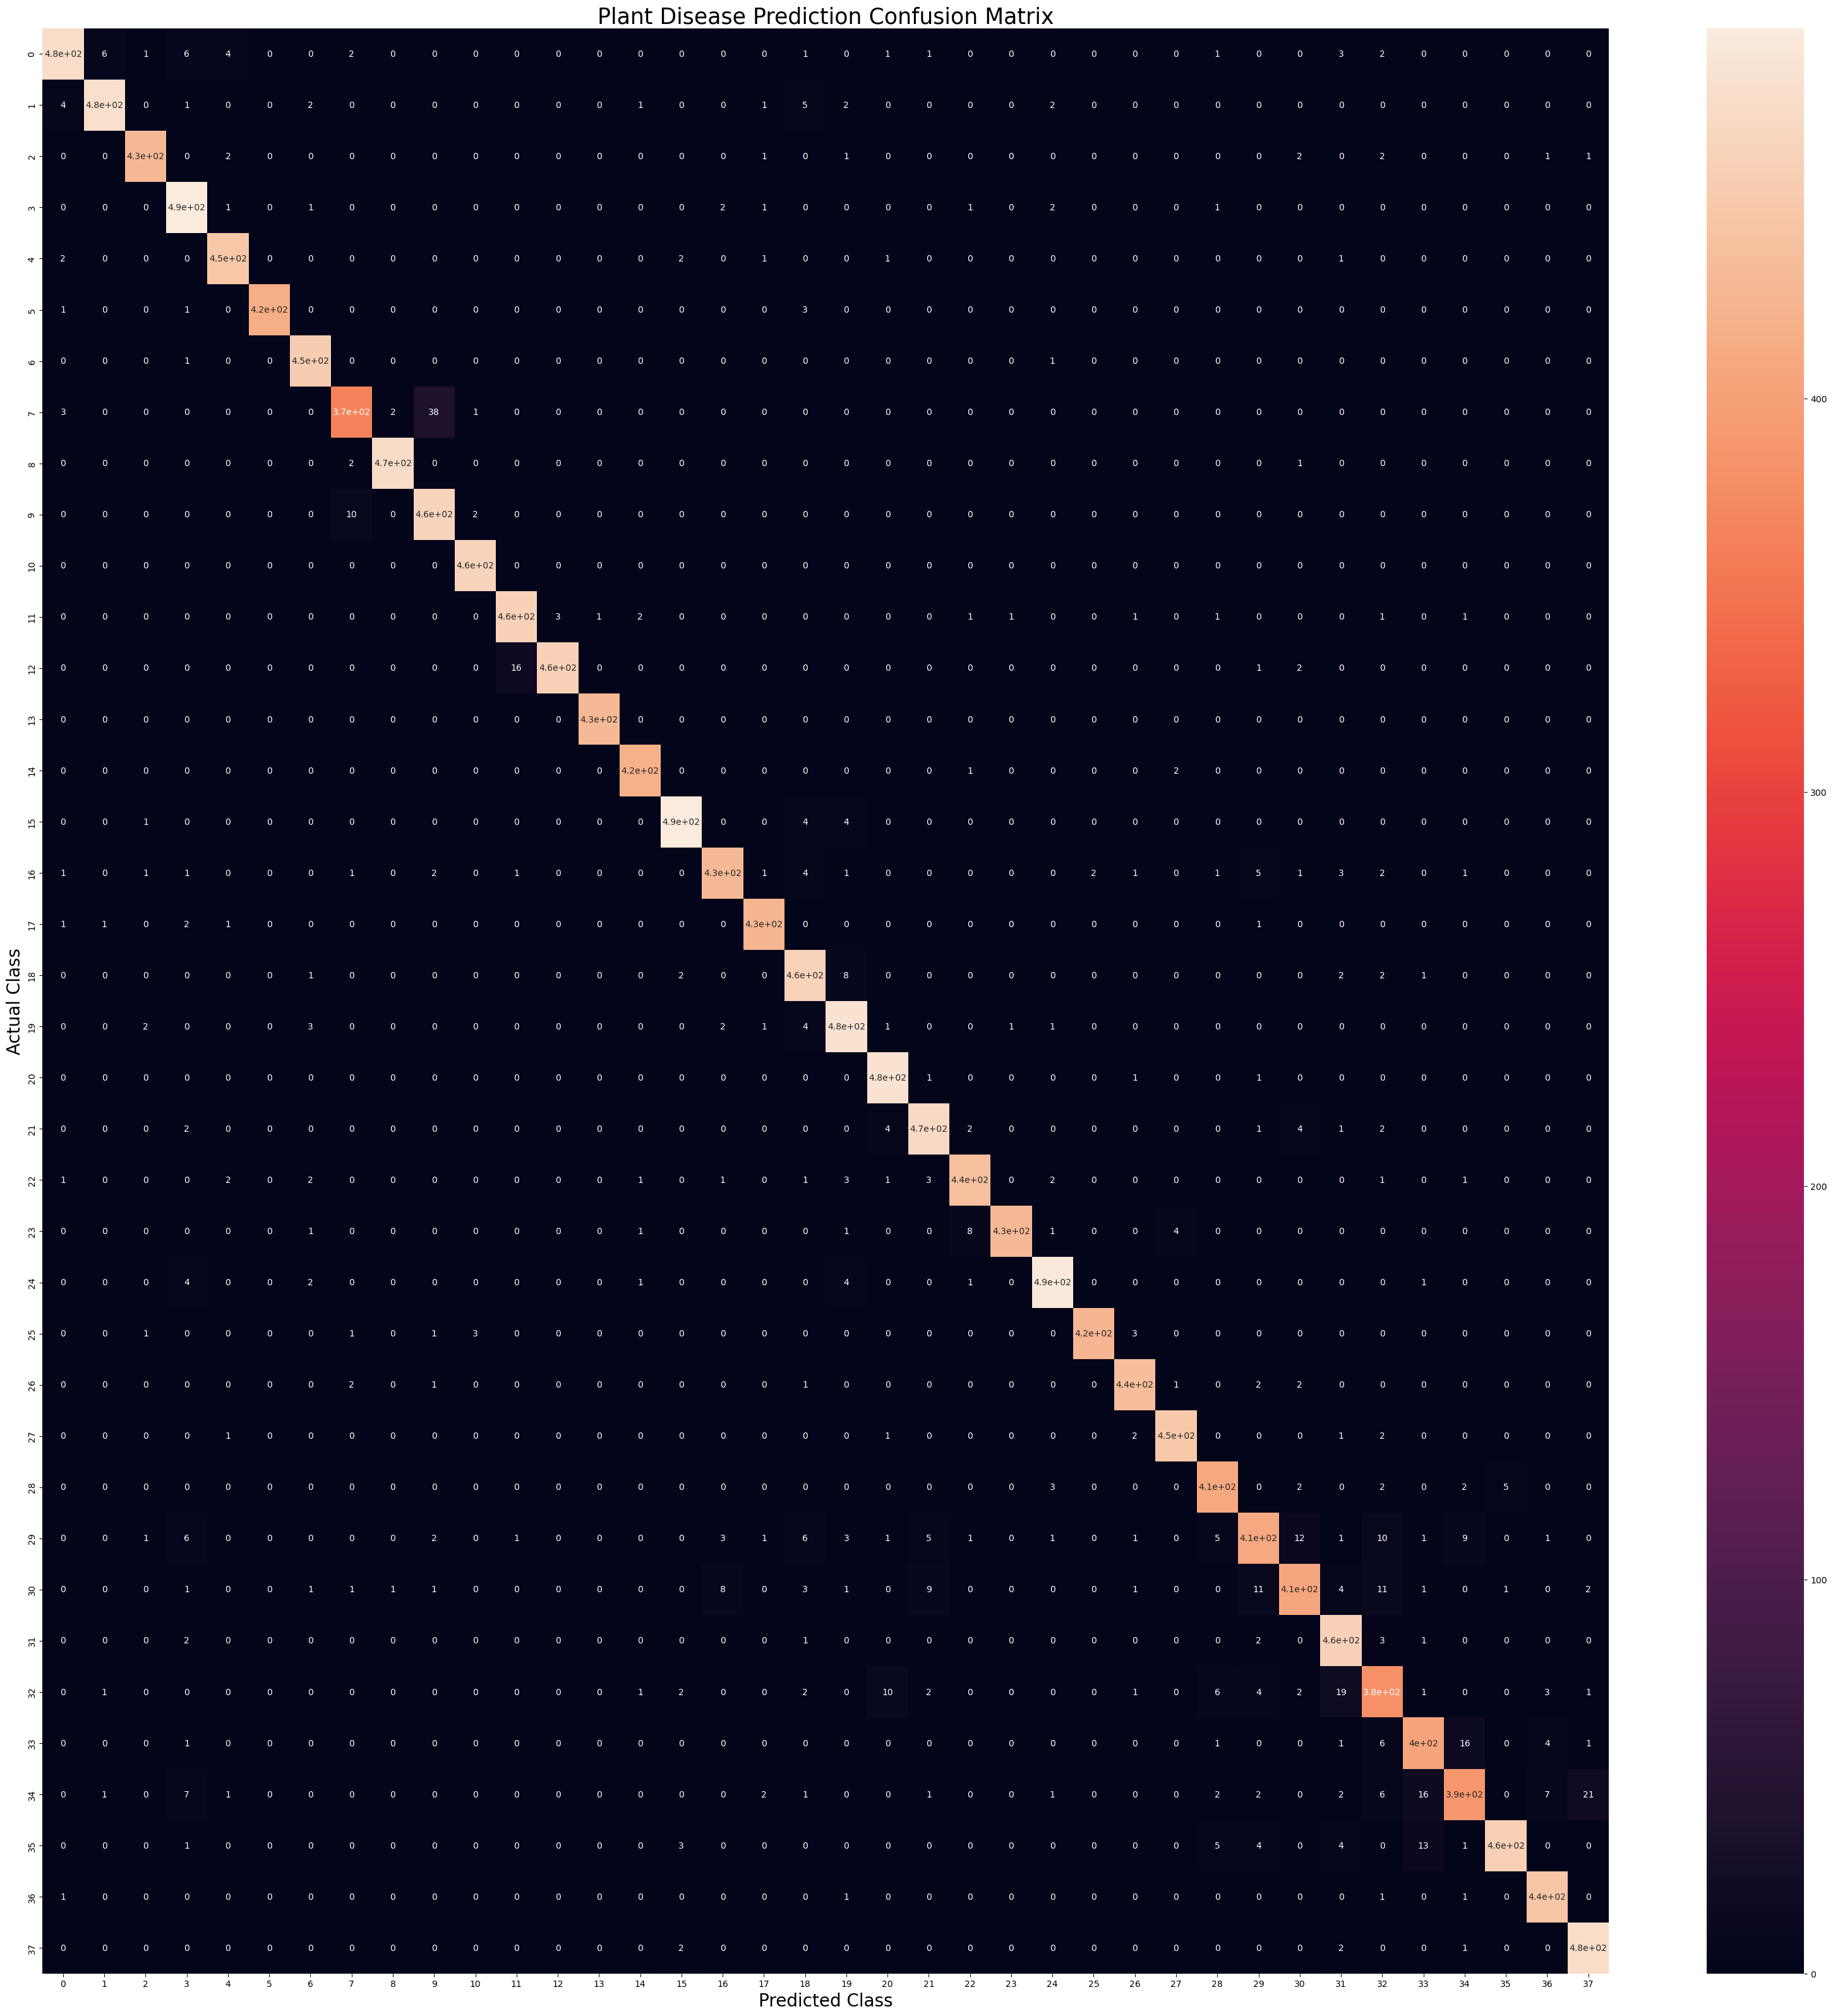

In [76]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size': 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()